In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import sys
sys.path.insert(0, '../')

In [2]:
from libra import Star, Spot, trappist1, transit_model

In [3]:
u1, u2 = trappist1('b').u

spots = [Spot.from_latlon(10, 0, 0.05),
         Spot.from_latlon(10, 120, 0.05), 
          Spot.from_latlon(10, 260, 0.05), 
          Spot.from_latlon(10, 300, 0.05),
          Spot.from_latlon(10, 49, 0.05)]

star = Star(u1=u1, u2=u2, rotation_period=3.3*u.day, 
            spots=spots)

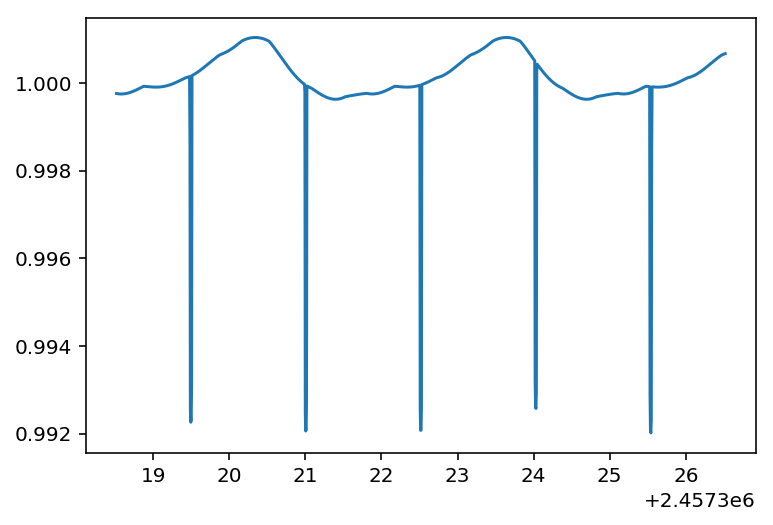

In [4]:
times = np.linspace(trappist1('b').t0 - 4, trappist1('b').t0 + 4, 1500)
# times = np.arange(trappist1('b').t0 - 0.05, trappist1('b').t0 + 0.05, 1/60/24)

stellar_flux = star.flux(times)
stellar_flux /= np.median(stellar_flux)

transit = transit_model(times, trappist1('b'))

model_flux = stellar_flux * transit

plt.plot(times, model_flux)

../libra/starspots/star.py:310: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


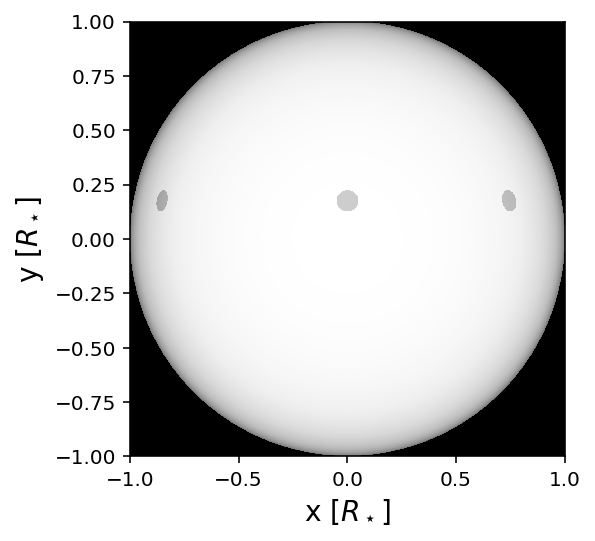

In [5]:
star.plot()